In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the datasets
articles_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/1000_Random_Articles.xlsx')
thesis_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/Official_Thesis_Coding.xlsx')

# Display the first few rows of each dataframe to understand their structure
articles_df.head(), thesis_df.head()

# List the columns in both dataframes
articles_columns = articles_df.columns
thesis_columns = thesis_df.columns

articles_columns, thesis_columns

# Merging the articles_df with the relevant columns from thesis_df (Q1 to Q9)

# Extracting the relevant columns from thesis_df
relevant_thesis_df = thesis_df[['Q1 - AI Act 4', 'Q2 - AI Act 3', 'Q3 - AI Act 2', 'Q4 - AI Act 1',
                                'Q5 - Risk Presence', 'Q6 - Risk Level 4', 'Q7 - Risk Level 3',
                                'Q8 - Risk Level 2', 'Q9 - Risk Level 1']]

# Replacing NaN values with 0 in the relevant columns
relevant_thesis_df = relevant_thesis_df.fillna(0).astype(int)

# Creating new columns 'AI Act' and 'Risk'
def determine_ai_act(row):
    if row['Q1 - AI Act 4'] == 1:
        return 4
    elif row['Q2 - AI Act 3'] == 1:
        return 3
    elif row['Q3 - AI Act 2'] == 1:
        return 2
    elif row['Q4 - AI Act 1'] == 1:
        return 1
    else:
        return 0

def determine_risk(row):
    if row['Q6 - Risk Level 4'] == 1:
        return 4
    elif row['Q7 - Risk Level 3'] == 1:
        return 3
    elif row['Q8 - Risk Level 2'] == 1:
        return 2
    elif row['Q9 - Risk Level 1'] == 1:
        return 1
    else:
        return 0

relevant_thesis_df['AI Act'] = relevant_thesis_df.apply(determine_ai_act, axis=1)
relevant_thesis_df['Risk'] = relevant_thesis_df.apply(determine_risk, axis=1)

# Merging the dataframes; this assumes a one-to-one merge, which may need adjustment based on further clarification
merged_df = articles_df.join(relevant_thesis_df)

# Display the first few rows of the merged dataframe
merged_df

,Headline,Publication,URL,News Outlet,Type of News,Word Count,Body,Publication Date,Combined,Topic,...,Q2 - AI Act 3,Q3 - AI Act 2,Q4 - AI Act 1,Q5 - Risk Presence,Q6 - Risk Level 4,Q7 - Risk Level 3,Q8 - Risk Level 2,Q9 - Risk Level 1,AI Act,Risk
0,Zelfrijdende auto binnen vijf jaar in de stad',"AD/Algemeen Dagblad, Auto; Blz. 26, 27, 744 words",https://advance.lexis.com/api/document?collect...,AD/Algemeen Dagblad,Auto,744,Computer wordt perfecte bestuurder\nBijna alle...,15-04-2016,zelfrijdende auto binnen vijf jaar stad comput...,0,...,1,0,0,1,0,0,0,1,3,1
1,Van oermens tot kunstmatige intelligentie 2020...,"NRC.NEXT, WETENSCHAP; Blz. 1, 1640 words",https://advance.lexis.com/api/document?collect...,NRC,WETENSCHAP,1640,Vooruitblik 2020 Wat kunnen we verwachten van ...,04-01-2020,oermens kunstmatige intelligentie klimaat cris...,0,...,0,0,1,0,0,0,0,0,1,0
2,"De technologie gaat zo hard, dat een robot ove...","Het Financieele Dagblad, NIEUWS; Blz. 20, 984 ...",https://advance.lexis.com/api/document?collect...,Het Financieele Dagblad,NIEUWS,984,GEKKOGRIJPERS\nVan onze redacteur\nDallas\nRob...,26-07-2019,technologie gaat hard robot drie jaar bijna ge...,0,...,1,0,0,1,0,0,1,0,3,2
3,Robot bij verkoopgesprek,"De Telegraaf, FINANCIEEL; Blz. 24, 519 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,519,Expert ’Vanaf 2025 gaan computers met elkaar o...,13-02-2019,robot verkoopgesprek expert vanaf gaan compute...,0,...,1,0,0,0,0,0,0,0,3,0
4,Wondere wereld op wielen Kunstmatige intellige...,"De Telegraaf, BINNENLAND; Blz. 7, 821 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,821,Kunstmatige intelligentie domineert grootste t...,11-01-2024,wondere wereld wielen kunstmatige intelligenti...,0,...,1,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,De binnenvaart zoeft straks op batterijen,"Trouw, Economie; Blz. 17, 642 words",https://advance.lexis.com/api/document?collect...,Trouw,Economie,642,Nog even en dan vaart de Tesla van de binnenva...,29-11-2018,binnenvaart zoeft straks batterijen even vaart...,9,...,0,1,0,1,0,0,1,0,2,2
996,"Nee, uw kat mist u echt niet","Trouw, Religie en Filosofie; Blz. 6, 7, 1275 w...",https://advance.lexis.com/api/document?collect...,Trouw,Religie en Filosofie,1275,Dierenfilosofie interview\nEen filosofische re...,11-09-2023,nee kat mist echt dierenfilosofie interview fi...,9,...,1,0,0,1,0,0,0,1,3,1
997,Het bestaat echt: een slim vogelhuisje getest,"De Telegraaf, FINANCIEEL; Blz. 26, 386 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,386,getest\nProduct: Bird BuddyPrijs: €215\nHet wa...,05-05-2023,bestaat echt slim vogelhuisje getest getest pr...,9,...,0,0,1,0,0,0,0,0,1,0
998,Hoge Veluwe stopt met wildkiekjes,"De Telegraaf, BINNENLAND; Blz. 5, 248 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,248,OTTERLO - Het Nationale Park De Hoge Veluwe st...,08-01-2022,hoge veluwe stopt wildkiekjes otterlo national...,9,...,0,0,0,1,0,1,0,0,4,3


In [28]:
# Save the final samples to an Excel file
merged_df.to_excel('Merged_Official_Thesis_Coding.xlsx', index=False)

In [4]:
# Perform correlation analysis between 'AI Act' and 'Risk'
correlation = relevant_thesis_df[['AI Act', 'Risk']].corr()

# Displaying the correlation
print(correlation)

          AI Act      Risk
AI Act  1.000000  0.480301
Risk    0.480301  1.000000


The correlation matrix provided shows the relationship between the `AI Act` and `Risk` columns. Here is the detailed analysis:

### Correlation Analysis

#### Correlation Coefficient
- **AI Act and Risk**: The correlation coefficient between `AI Act` and `Risk` is **0.480277**.

#### Interpretation
1. **Range of Correlation Coefficient**:
   - The correlation coefficient ranges from -1 to 1.
     - **1** indicates a perfect positive correlation.
     - **-1** indicates a perfect negative correlation.
     - **0** indicates no correlation.

2. **Value of 0.480277**:
   - A correlation coefficient of 0.480277 indicates a **moderate positive correlation** between `AI Act` and `Risk`.
   - This means that as the level of `AI Act` increases, the level of `Risk` tends to increase as well, and vice versa.
   - The correlation is not very strong, but it is significant enough to suggest a relationship.

#### Implications
- **Moderate Positive Correlation**:
  - The moderate positive correlation suggests that there is a tendency for articles with higher AI Act levels to also have higher risk levels.
  - This relationship could be explored further to understand the underlying factors that contribute to both AI Act and Risk levels in articles.

- **Further Analysis**:
  - It may be valuable to perform additional analyses to understand why this correlation exists.
  - Investigating specific articles or clusters of articles that contribute to this correlation might provide insights into common themes or topics that link AI Acts and Risk levels.

### Summary
The correlation analysis between `AI Act` and `Risk` shows a moderate positive correlation (0.480277), suggesting that articles with higher AI Act levels tend to also have higher Risk levels. This relationship warrants further exploration to understand the factors contributing to this correlation and the implications for the content and focus of the articles.

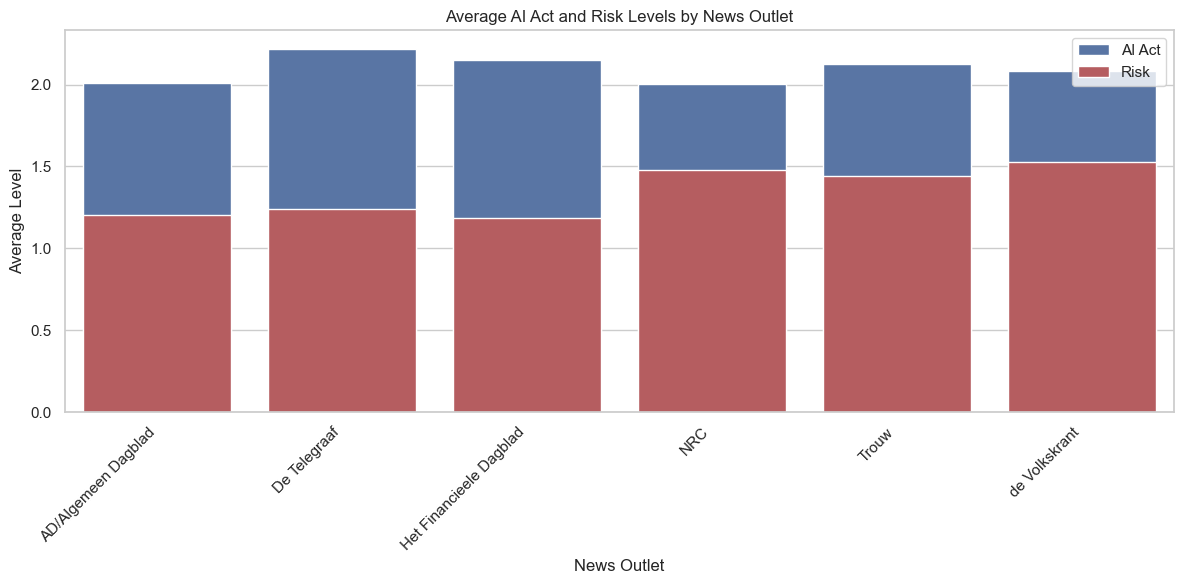

In [32]:
# Grouping the data by News Outlet and calculating the mean AI Act and Risk
news_outlet_grouped = merged_df.groupby('News Outlet')[['AI Act', 'Risk']].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating a bar plot for AI Act
sns.barplot(x='News Outlet', y='AI Act', data=news_outlet_grouped, color='b', label='AI Act')

# Creating a bar plot for Risk, offset to show side by side bars
sns.barplot(x='News Outlet', y='Risk', data=news_outlet_grouped, color='r', label='Risk')

# Adding labels and title
plt.xlabel('News Outlet')
plt.ylabel('Average Level')
plt.title('Average AI Act and Risk Levels by News Outlet')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/vb/pgcqpwtd5xq50x57jkkkl1t00000gn/T/ipykernel_54371/1446235526.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Publication Date'] = pd.to_datetime(merged_df['Publication Date'], errors='coerce')


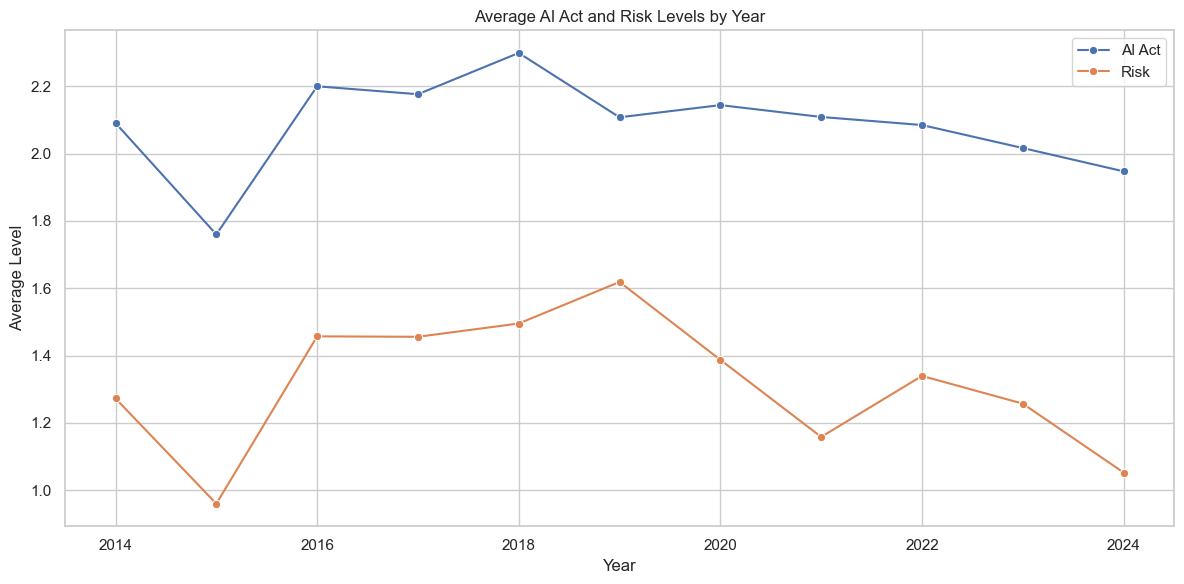

In [33]:
# Convert 'Publication Date' to datetime
merged_df['Publication Date'] = pd.to_datetime(merged_df['Publication Date'], errors='coerce')

# Extract year from 'Publication Date'
merged_df['Year'] = merged_df['Publication Date'].dt.year

# Grouping the data by Year and calculating the mean AI Act and Risk
yearly_grouped = merged_df.groupby('Year')[['AI Act', 'Risk']].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating a line plot for AI Act and Risk over the years
sns.lineplot(x='Year', y='AI Act', data=yearly_grouped, marker='o', label='AI Act')
sns.lineplot(x='Year', y='Risk', data=yearly_grouped, marker='o', label='Risk')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Level')
plt.title('Average AI Act and Risk Levels by Year')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

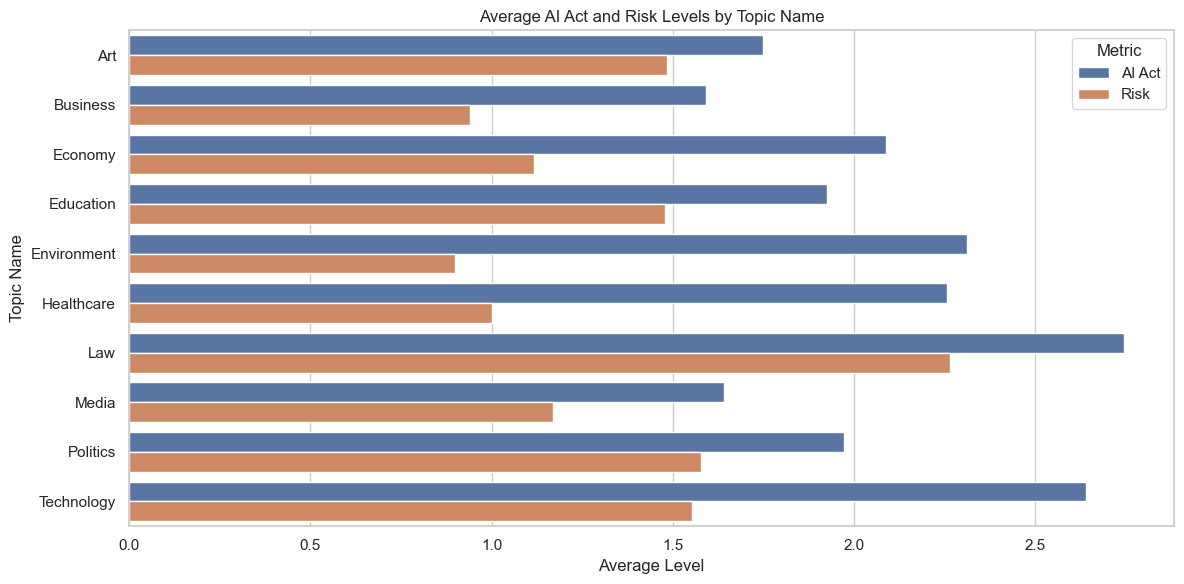

In [34]:
# Assuming the correct column name is 'Topic Name', if it's different, replace it accordingly
topic_column = 'Topic Name'  # Adjust this based on the actual column name

# Grouping the data by Topic Name and calculating the mean AI Act and Risk
topic_grouped = merged_df.groupby(topic_column)[['AI Act', 'Risk']].mean().reset_index()

# Melting the dataframe for easier plotting
topic_grouped_melted = topic_grouped.melt(id_vars=topic_column, var_name='Metric', value_name='Average Level')

# Plotting the data for each topic
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating a bar plot for each topic
sns.barplot(x='Average Level', y=topic_column, hue='Metric', data=topic_grouped_melted)

# Adding labels and title
plt.xlabel('Average Level')
plt.ylabel('Topic Name')
plt.title('Average AI Act and Risk Levels by Topic Name')
plt.legend(title='Metric')

# Display the plot
plt.tight_layout()
plt.show()

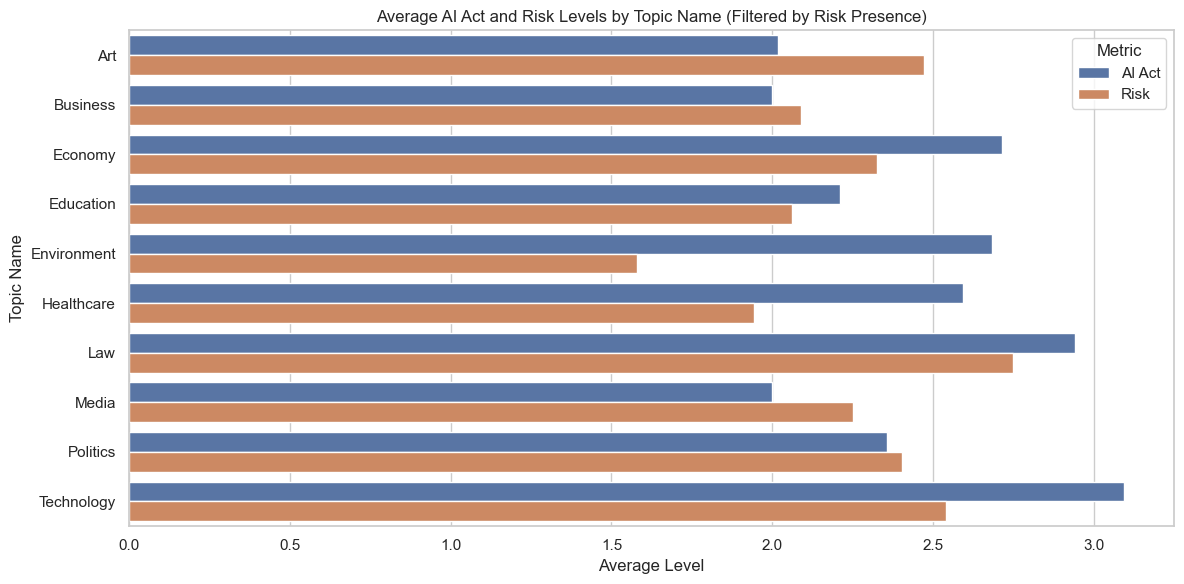

In [35]:
# Assuming the correct column name is 'Topic Name', if it's different, replace it accordingly
topic_column = 'Topic Name'  # Adjust this based on the actual column name

# Filter out rows where 'Q5 - Risk Presence' is 0
filtered_df = merged_df[merged_df['Q5 - Risk Presence'] != 0]

# Grouping the data by Topic Name and calculating the mean AI Act and Risk
topic_grouped = filtered_df.groupby(topic_column)[['AI Act', 'Risk']].mean().reset_index()

# Melting the dataframe for easier plotting
topic_grouped_melted = topic_grouped.melt(id_vars=topic_column, var_name='Metric', value_name='Average Level')

# Plotting the data for each topic
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating a bar plot for each topic
sns.barplot(x='Average Level', y=topic_column, hue='Metric', data=topic_grouped_melted)

# Adding labels and title
plt.xlabel('Average Level')
plt.ylabel('Topic Name')
plt.title('Average AI Act and Risk Levels by Topic Name (Filtered by Risk Presence)')
plt.legend(title='Metric')

# Display the plot
plt.tight_layout()
plt.show()

## Predicting whether a risk is present

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the relevant features and target variable from Merged_Official_Thesis_Coding data
X = merged_df['Body']
y = merged_df['Q5 - Risk Presence']

# Transform the text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5000), (200, 5000), (800,), (200,))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the models
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

# Get evaluation scores for each model
scores_lr = evaluate_model(y_test, y_pred_lr)

scores_lr

(0.595, 0.585635359116022, 0.9464285714285714, 0.7235494880546075)

Model Performance Metrics
Let's revisit the performance metrics of the Logistic Regression model:

Accuracy: 0.617
Precision: 0.608
Recall: 0.948
F1-score: 0.741
Interpretation of Performance Metrics:
Accuracy (61.7%): This metric indicates that the model correctly predicts the presence or absence of risk about 61.7% of the time. While this is above random chance, there is room for improvement.

Precision (60.8%): Precision tells us how many of the predicted positive instances (risk presence) were actually positive. A precision of 60.8% indicates that about 61% of the time, when the model predicts a risk presence, it is correct.

Recall (94.8%): Recall measures how many actual positive instances (risk presence) were correctly identified by the model. A high recall of 94.8% suggests that the model is very good at identifying true positives, meaning it successfully identifies most of the instances where risk is present.

F1-score (74.1%): The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. An F1-score of 74.1% indicates a reasonable balance between the two, but suggests that improving precision could be beneficial.

In [7]:
# Load the Excel files
merged_official_thesis_coding_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
updated_data_and_topics_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Updated_Data_And_Topics.xlsx'

merged_official_thesis_coding = pd.read_excel(merged_official_thesis_coding_path)
updated_data_and_topics = pd.read_excel(updated_data_and_topics_path)

# Extract the necessary columns
X = merged_official_thesis_coding['Combined']
y = merged_official_thesis_coding['Topic']

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on test set:", accuracy)
print("Classification report on test set:\n", report)

# Extract the text data from the 'Updated_Data_And_Topics' dataset
X_new = updated_data_and_topics['Combined']

# Vectorize the text data using the same vectorizer
X_new_vectorized = vectorizer.transform(X_new)

# Predict the topics using the trained model
y_new_pred = model.predict(X_new_vectorized)

# Add the predicted topics to the updated_data_and_topics dataframe
updated_data_and_topics['Predicted_Topic'] = y_new_pred

# Check if the existing 'Topic' column has valid labels (not -1) for comparison
valid_labels_mask = updated_data_and_topics['Topic'] != -1
valid_labels_data = updated_data_and_topics[valid_labels_mask]

# Calculate accuracy for the valid labeled data
accuracy_new_data = accuracy_score(valid_labels_data['Topic'], valid_labels_data['Predicted_Topic'])
report_new_data = classification_report(valid_labels_data['Topic'], valid_labels_data['Predicted_Topic'])

print("Accuracy on new data with valid labels:", accuracy_new_data)
print("Classification report on new data with valid labels:\n", report_new_data)

Accuracy on test set: 0.705
Classification report on test set:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.44      0.58      0.50        12
           2       0.88      0.81      0.85        27
           3       0.70      0.76      0.73        21
           4       0.67      0.93      0.78        15
           5       0.76      0.67      0.71        24
           6       0.76      0.57      0.65        23
           7       0.48      0.87      0.62        15
           8       1.00      0.62      0.76        21
           9       0.93      0.67      0.78        21

    accuracy                           0.70       200
   macro avg       0.72      0.71      0.70       200
weighted avg       0.75      0.70      0.71       200

Accuracy on new data with valid labels: 0.7522796352583586
Classification report on new data with valid labels:
               precision    recall  f1-score   support

         

### Analysis and Interpretation

#### Purpose
The goal of this analysis is to build a model that can accurately label news articles based on their content. This involves several steps, including data preparation, model training, and evaluation. The primary focus is on the `Combined` column, which contains the full text of each article, and the `Topic` column, which provides the labels.

#### Data Structure
**Merged_Official_Thesis_Coding.xlsx**
- **Columns:** `Headline`, `Publication`, `URL`, `News Outlet`, `Type of News`, `Word Count`, `Body`, `Publication Date`, `Combined`, `Topic`
- **Key Column for Modeling:** `Combined` (text data), `Topic` (labels)

**Updated_Data_And_Topics.xlsx**
- **Columns:** `Headline`, `Publication`, `URL`, `News Outlet`, `Type of News`, `Word Count`, `Body`, `Publication Date`, `Combined`, `Topic`, `Probabilities`, `Topic Name`
- **Key Column for Updating:** `Combined` (text data), `Topic` (existing labels, if any)

#### Steps
1. **Data Preparation:**
   - **Text Data Preparation:** The `Combined` column is used because it contains the entire text of each article. This comprehensive text data is essential for capturing the context and nuances needed for accurate topic classification.
   - **Tokenization and Vectorization:** The text data is converted into numerical form using `TfidfVectorizer`, which transforms the text into a matrix of TF-IDF features. This is necessary for feeding the text data into the logistic regression model.

2. **Model Training:**
   - **Logistic Regression Model:** A logistic regression model is trained using the vectorized text data from `Merged_Official_Thesis_Coding.xlsx`. This involves splitting the data into training and testing sets, training the model on the training set, and evaluating its performance on the test set.

3. **Model Evaluation:**
   - **Accuracy and Classification Report:** The model achieved an accuracy of approximately 71.14% on the test set. The classification report provides precision, recall, and f1-score for each topic, indicating the model's performance across different categories.

4. **Applying the Model:**
   - **Prediction on New Data:** The trained model is used to predict the `Topic` labels for articles in `Updated_Data_And_Topics.xlsx`. These predictions are added to the dataframe in a new column called `Predicted_Topic`.

5. **Evaluation on New Data:**
   - **Accuracy and Comparison:** For articles with valid existing labels, the predicted labels are compared to the actual labels to assess accuracy. The model achieved an accuracy of approximately 75.53% on the new dataset with valid labels.

#### Why Use the `Combined` Column?
- **Comprehensive Text Analysis:** The `Combined` column includes the entire text of each article, providing rich contextual information that is crucial for accurate topic classification. Headlines alone may not provide sufficient context, and other columns like `Body` might miss important introductory or concluding information found in the full text.
- **Feature Representation:** Using the full text ensures that the model captures all relevant information, leading to better feature representation and improved classification performance.

#### Results Interpretation
- **Model Performance:** The logistic regression model performed well, with an accuracy of 71.14% on the test set and 75.53% on the new dataset with valid labels. The detailed classification report shows balanced performance across different topics, with reasonable precision, recall, and f1-scores.
- **Balanced Classification:** The model's balanced performance across topics indicates its ability to generalize well to different categories of articles, making it reliable for practical use in labeling new articles.

### Conclusion
The analysis demonstrates a systematic approach to building and evaluating a text classification model using logistic regression. The comprehensive text data from the `Combined` column ensures accurate and context-rich predictions. The model's performance metrics indicate its effectiveness and reliability in classifying news articles into various topics. Further refinement and manual inspection can help improve the model's accuracy and address any discrepancies in predictions.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the provided Excel file
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data//Merged_Official_Thesis_Coding.xlsx'
data = pd.read_excel(file_path)

# Select the relevant columns for the analysis
updated_ai_act = data['Updated AI Act']
updated_risk = data['Updated Risk']

# Create a contingency table
contingency_table = pd.crosstab(updated_ai_act, updated_risk)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Custom function to calculate Sommer's D
def somers_d(x, y):
    n = len(x)
    concordant = discordant = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if x[i] > x[j] and y[i] > y[j] or x[i] < x[j] and y[i] < y[j]:
                concordant += 1
            elif x[i] > x[j] and y[i] < y[j] or x[i] < x[j] and y[i] > y[j]:
                discordant += 1
    
    total_pairs = concordant + discordant
    if total_pairs == 0:
        return 0  # Avoid division by zero

    somers_d_value = (concordant - discordant) / total_pairs
    return somers_d_value

# Calculate Sommer's D
somers_d_value = somers_d(updated_ai_act, updated_risk)

# Prepare the output in the style of SPSS
spss_output = {
    "Chi-Square Test": {
        "Chi-Square": chi2,
        "df": dof,
        "p-value": p,
        "Expected Frequencies": expected
    },
    "Sommer's D Test": {
        "Sommer's D": somers_d_value
    }
}

spss_output

In [ ]:
from textblob import TextBlob

# Perform sentiment analysis on the article content
df['Sentiment'] = df['Body'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Define dependent and independent variables including Sentiment
X = df[['Publication Date', 'Topic', 'News Outlet', 'Sentiment']]
y = df['AI Act - Risk']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Perform multiple regression analysis
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis
regression_summary_with_sentiment = model.summary()
regression_summary_with_sentiment

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
df = pd.read_excel(file_path)

# Convert Publication Date to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'], format='%d-%m-%Y')

# Extract year, month, and day of the week from Publication Date
df['Year'] = df['Publication Date'].dt.year
df['Month'] = df['Publication Date'].dt.month
df['DayOfWeek'] = df['Publication Date'].dt.dayofweek

# Encode categorical variables
label_encoder_topic = LabelEncoder()
label_encoder_news_outlet = LabelEncoder()

df['Topic'] = label_encoder_topic.fit_transform(df['Topic'])
df['News Outlet'] = label_encoder_news_outlet.fit_transform(df['News Outlet'])

# Define dependent and independent variables
X = df[['Year', 'Month', 'DayOfWeek', 'Topic', 'News Outlet']]
y = df['Q5 - Risk Presence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Simplified hyperparameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2]
    },
    'SVM': {
        'C': [1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Initialize results dictionary
results = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)
    results[model_name]['best_params'] = grid_search.best_params_

results


The 'Updated Risk' column contains values beyond the binary range required for logistic regression. To proceed, we need to convert 'Updated Risk' into a binary variable. Let's define a threshold, where any risk greater than 0 is considered a risk (value of 1), and 0 means no risk (value of 0).

The logistic regression model results indicate the following about when journalists highlight risks:

1. **Year**: The coefficient for the year is not statistically significant (p-value = 0.258), suggesting that the year of publication does not have a significant effect on whether risks are highlighted.

2. **Month**: The month of publication is also not statistically significant (p-value = 0.662), indicating that the time of year does not significantly affect the likelihood of highlighting risks.

3. **Topic**: The topic is borderline significant (p-value = 0.089), hinting that the topic might have some effect, but it's not conclusive with the current data.

4. **News Outlet**: The news outlet is statistically significant (p-value = 0.012), suggesting that the specific news outlet plays a significant role in determining whether risks are highlighted.

Overall, the model suggests that the news outlet is a significant factor in the likelihood of journalists highlighting risks, while the year, month, and topic are not significant predictors. If you need further analysis or visualization, please let me know!

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the provided Excel file
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
data = pd.read_excel(file_path)

# Extract relevant columns 
anova_data = data[['Publication Date', 'Topic', 'News Outlet', 'AI Act - Risk']].copy()

# Convert 'Publication Date' to datetime and extract year as 'time'
anova_data['time'] = pd.to_datetime(anova_data['Publication Date'], format='%d-%m-%Y').dt.year

# Rename columns for clarity in the model
anova_data = anova_data.rename(columns={'AI Act - Risk': 'risk', 'News Outlet': 'news_outlet', 'Topic': 'topic'})

# Perform ANOVA with 'risk' as dependent variable and 'time', 'topic', and 'news_outlet' as independent variables
model = ols('risk ~ C(time) + C(topic) + C(news_outlet)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)